In [1]:
from search import *
import pygame,sys
from pygame.locals import *

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
maze,start,end=read_maze('MazeData.txt')

空间复杂度:8, 时间复杂度:220
空间复杂度:8, 时间复杂度:226
空间复杂度:8, 时间复杂度:224
空间复杂度:9, 时间复杂度:161


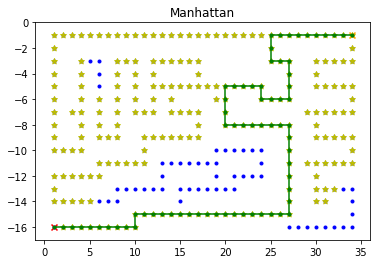

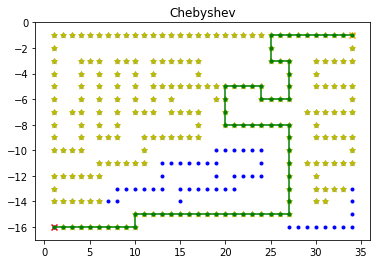

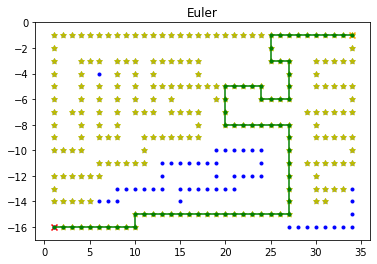

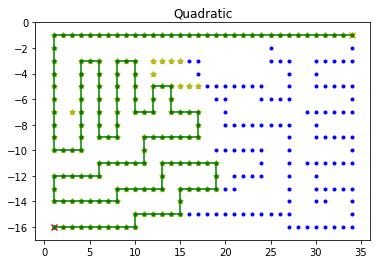

In [6]:
for method in heuristic_methods:
    res,visited,visited_list=A_star(maze,start,end,heuristic=heuristic_methods[method])
    plt.figure()
    plt.title(method)
    draw_map(getCoord(maze,['0','S','E']),plt.scatter,'b','.')
    draw_map(getCoord(visited,[1]),plt.scatter,'y','*')
    draw_map(start,plt.scatter,'orange','x')
    draw_map(end,plt.scatter,'r','x')
    draw_map(([obj[0] for obj in res],[obj[1] for obj in res]),plt.plot,'g','.')
    plt.savefig('img/{}.svg'.format(method))    
    plt.sha

空间复杂度:8, 时间复杂度:269


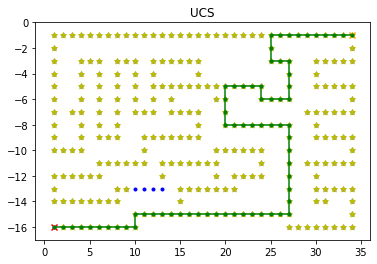

In [5]:
res,visited,visited_list=UCS(maze,start,end)
plt.figure()
plt.title('UCS')
draw_map(getCoord(maze,['0','S','E']),plt.scatter,'b','.')
draw_map(getCoord(visited,[1]),plt.scatter,'y','*')
draw_map(start,plt.scatter,'orange','x')
draw_map(end,plt.scatter,'r','x')
draw_map(([obj[0] for obj in res],[obj[1] for obj in res]),plt.plot,'g','.')
plt.savefig('img/UCS.svg')

In [ ]:
with open('MazeData.txt','r',encoding='utf-8') as f:
    maze=[]
    for row,line in enumerate(f.readlines()):
        line=line.strip()
        s=line.find('S')
        if (-1!=s):
            start=(row,s)
        e=line.find('E')
        if (-1!=e):
            end=(row,e)
        maze.append(line)
    f.close()

len_methods=len(heuristic_methods)+1
    
res=[0]*len_methods
visited=[0]*len_methods
visited_list=[0]*len_methods

res[0],visited[0],visited_list[0]=UCS(maze,start,end)

for i, method in enumerate(heuristic_methods):
    res[i+1],visited[i+1],visited_list[i+1]=A_star(maze,start,end,heuristic=heuristic_methods[method])
    
pinkColor = pygame.Color(255, 182, 193)
blackColor = pygame.Color(0, 0, 0)
whiteColor = pygame.Color(255, 255, 255)
redColor = pygame.Color(255,   0,   0)
blueColor = pygame.Color(   0,  0,  255)
yellowColor = pygame.Color(   255,  255,  0)

pygame.display.set_caption("lab8:搜索")
pygame.init()
time_clock = pygame.time.Clock()

screen = pygame.display.set_mode(( 360,180*len_methods))

cnt=[0]*len_methods

while True:
    for k in range(len_methods):
        for i in range(len(maze)):
            for j in range(len(maze[0])):
                if maze[i][j] == '1':
                    pygame.draw.rect(screen,redColor, Rect(j*10,180*k+i*10,10,10))
                if maze[i][j] == 'S':
                    pygame.draw.rect(screen,pinkColor, Rect(j*10,180*k+i*10,10,10))
                if maze[i][j] == 'E':
                    pygame.draw.rect(screen,whiteColor, Rect(j*10,180*k+i*10,10,10))
    '''
    for pos in path:
        if g.check_value(pos) != 'S' and g.check_value(pos) != 'E':
            pygame.draw.rect(screen,blueColor, Rect(pos[1]*10,pos[0]*10,10,10))
    '''
    for k in range(len_methods):
        pos = visited_list[k][cnt[k]].pos
        if pos not in res[k]:
            pygame.draw.rect(screen,yellowColor, Rect(pos[1]*10,180*k+pos[0]*10,10,10))
        else:        
            pygame.draw.rect(screen,blueColor, Rect(pos[1]*10,180*k+pos[0]*10,10,10))
        if cnt[k] < len(visited_list[k]) - 1:
            cnt[k]+=1

    
    pygame.display.flip()
    for event in pygame.event.get():
        # 判断是否为退出事件
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
    
    time_clock.tick(40)